**Inclass material for Week 3: Data Wrangling and Visualization**

This notebook was made based on main materials `3_Data_Wrangling_and_Visualization.ipynb`

Version: Theia - September 2022

# Data Wrangling and Visualization

Berikut adalah method yang telah kita pelajari di dua course sebelumnya:

**Data Inspection** (Course: Python for Data Analysts)
- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`
- Subsetting using `.loc`, `.iloc` and conditionals

**Diagnostic and Exploratory** (Course: Exploratory Data Analysis)
- Tables
- Cross-Tables and Aggregates
- Using `aggfunc` for aggregate functions
- Pivot Tables
- Working with DateTime
- Working with Categorical Data
- Duplicates and Missing Value Treatment

---

**Training Objectives for Course Data Wrangling and Visualization**

- Working with MultiIndex DataFrames
- Stacking and Unstacking
- Reshaping your DataFrame with Melt
- Using Group By Effectively
- Visual Data Exploratory

**Agenda Day 1**

- Reproducible Environment
    - Apa dan mengapa dilakukan reproducible environment
    - Praktik untuk melakukan import dan export environment
- MultiIndex Dataframe
    - Mengetahui bentuk MultiIndex Dataframe
    - Reshaping
        - Cross-section `xs()`
        - Stack Dataframe
        - Unstack Dataframe

# Reproducible Environment

Bayangkan Anda sedang mengerjakan suatu proyek yang membutuhkan kolaborasi dengan tim. Proyek tersebut diinisiasi oleh Anda, code dan packages pada komputer Anda berjalan dengan baik. Kemudian Anda ingin membagikan proyek tersebut kepada tim Anda. Apakah tim Anda harus melakukan instalasi package satu per satu secara manual? Tentu tidak, di sini Anda membuat suatu **environment** yang dapat di-reproducible (digandakan) dengan membuat suatu file `requirements.txt`.

Lihat pada folder `/assets`, Anda akan menemukan file `requirements.txt` yang isinya seperti ini:
```
numpy==1.21.4
pandas==1.3.4
matplotlib==3.5.0
yfinance==0.1.67
...
```

File ini berisi daftar **packages beserta versinya** yang ada di environment dalam menjalankan proyek tertentu. File ini membantu tim Anda untuk mengembangkan suatu aplikasi dalam satu versi yang sama, sehingga mencegah terjadinya perubahan fungsi-fungsi yang tidak terduga.

## Exporting Requirements

Misal Anda ingin membagikan daftar packages suatu environment kepada tim Anda, maka lakukanlah langkah berikut:

1. Aktifkan environment
```
conda activate <ENV_NAME>
```

2. Navigasikan path ke folder tempat di mana file `requirements.txt` ingin disimpan
```
cd <PATH_TO_REQUIREMENTS_FOLDER>
```

3. Export environment: membuat daftar packages beserta versinya.
```
pip list --format=freeze > requirements.txt
```

💡 **Note**: Anda dapat menyimpan file dengan nama lain, namun sebagai **konvensi** biasa digunakan penamaan `requirements.txt`

## Importing Requirements

Misal Anda yang meneruskan proyek dan telah menerima file `txt` dari tim Anda, maka lakukanlah langkah berikut:

1. Aktifkan environment yang ingin digunakan
    ```
    conda activate <ENV_NAME>
    ```

    💡 Apabila belum ada, maka perlu membuat environment baru:
    ```
    conda create -n <ENV_NAME> python=<PYTHON_VERSION>
    ```
    
    ⚠️ Jangan lupa instalasi kernel di dalam environment tersebut apabila ingin dapat diakses menggunakan jupyter notebook:
    ```
    pip install ipykernel
    python -m ipykernel install --user --name=<ENV_NAME>
    ```

2. Navigasikan path ke folder di mana file `requirements.txt` berada
    ```
    cd <PATH_TO_REQUIREMENTS>
    ```

3. Instalasi packages dari file tersebut
    ```
    pip install -r requirements.txt
    ```

# Data Wrangling and Reshaping

## Load Data

### `yfinance`

Kita akan menggunakan library `yfinance` untuk mengakses data saham yang tersedia pada [Yahoo! Finance](https://finance.yahoo.com/). Penarikan data menggunakan `yfinance` membutuhkan koneksi internet.

Dokumentasi: https://pypi.org/project/yfinance/

In [1]:
import pandas as pd
import yfinance as data
pd.set_option('display.float_format', lambda x: '%.2f' % x)

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
symbol = ['AAPL', 'TSLA', 'GOOGL']
start_date = '2018-01-01' # 1 Januari 2018
end_date = '2022-09-18' # 18 September 2022

stock = data.download(tickers = symbol, start = start_date, end = end_date)
stock.columns.names = ['Attributes', 'Symbols']
stock.head() 

In [ ]:
symbol = ['BBCA.JK', 'BBRI.JK', 'BTC-USD']
start_date = '2018-01-01' # 1 Januari 2018
end_date = '2022-09-18' # 18 September 2022

stock = data.download(tickers = symbol, start = start_date, end = end_date)
stock.columns.names = ['Attributes', 'Symbols']
stock.head() 

Simbol:
- `AAPL`: Apple Inc.
- `TSLA`: Tesla
- `GOOGL`: Alphabet Inc. (Google)

Deskripsi data:
- `Date`: tanggal dalam format `yyyy-mm-dd`
- `High`: nilai saham **tertinggi** pada hari tersebut (satuan harga berdasarkan di mana perusahaan tsb berada)
- `Low`: nilai saham **terendah** pada hari tersebut
- `Open`: nilai saham saat **trading hours dibuka** pada hari tersebut
- `Close`: nilai saham saat **trading hours ditutup** pada hari tersebut
- `Adj Close`: nilai `Close` yang telah disesuaikan setelah stock split maupun pembagian dividen 
- `Volume`: jumlah lembar saham yang berpindah tangan pada hari tersebut (jumlah transaksi jual beli)

[Trading hours](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) dapat berbeda-beda pada tiap tempat. Di Indonesia (IDX/BEI), trading hours dibuka pada Senin - Jumat jam 09:00 WIB - 03:00 WIB.

### File Pickle

Pickling/Serializing: **menyimpan** suatu objek Python ke sebuah file binary (byte stream).
- Gunakan method `.to_pickle()`
- Contohnya objek DataFrame `stock` disimpan sebagai file `stock_2`
- Kemudian silahkan cek file pickle pada folder di mana file `.ipynb` ini berada

In [ ]:
# # hasil penarikan data dari Yahoo! Finance pada cell sebelumnya
stock.to_pickle('data_cache/stock_Theia')

In [ ]:
# #read pickle
pd.read_pickle('data_cache/stock_Theia').head()

Contoh menyimpan data stock menggunakan csv:

In [ ]:
stock.to_csv('data_cache/stock.csv')

In [ ]:
pd.read_csv('data_cache/stock.csv')

Unpickling/De-serializing: **membaca** suatu objek Python dari sebuah file binary (byte stream). 
- Gunakan method `pd.read_pickle()`
- Untuk selanjutnya, mari kita gunakan file pickle pada `data_cache/stock` yang untuk tanggal 1 Januari 2018 sampai 18 September 2022.

⚠️ Jangan pernah unpickling file yang berasal dari sumber yang tidak tepercaya, karena bisa saja file tersebut berisi script berupa virus yang dapat membahayakan sistem Anda.

💡 Dengan menggunakan file pickle kita **"mengawetkan"** struktur dari object Python, untuk DataFrame dapat terjaga tipe data dan indexnya.

In [ ]:
# membuat dummy data lalu konversi tipe data
dummy = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6, 7],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male'],
    'blood_type': ['O', 'A', 'B', 'AB', 'B', 'B', 'O'],
    'join_date': ['28 Jun 2021', '29 Jun 2021', '30 Jun 2021', '1 Jul 2021', '2 Jul 2021', '3 Jul 2021', '4 Jul 2021']
})

# ubah tipe data
dummy[['gender', 'blood_type']] = dummy[['gender', 'blood_type']].astype('category')
dummy['join_date'] = dummy['join_date'].astype('datetime64')
dummy.dtypes

In [ ]:
# simpan object dummy ke dalam folder data_cache nama filenya "dummy"
dummy.to_pickle('data_cache/dummy.acar')

In [ ]:
# baca dari pickle dan cek tipe data
pd.read_pickle('data_cache/dummy.acar').dtypes

Bandingkan dengan menyimpannya ke file text biasa, yaitu csv misalnya:

In [ ]:
# simpan ke file csv
dummy.to_csv('data_cache/dummy.csv', index=False)

# baca dari csv dan cek tipe data
pd.read_csv('data_cache/dummy.csv').dtypes

**Quick Summary pickle file**:

Kelebihan:
- menyimpan tipe data yang sama
- menyimpan bentuk object python dengan bentuk yang sama
- pickle ini lebih ringan dari csv

Kekurangan:
- hanya bisa di buka oleh python, jadi berhati hati menbuka pickle dari source yang tidak di kenal.

## Slicing Multi-Index DataFrame

Multi-Index Dataframe adalah bentuk dataframe yang memiliki level indexing lebih dari 1 baik pada baris, kolom, ataupun keduanya. Hal yang perlu diperhatikan dalam MultiIndex Dataframe adalah bentuk dataframe ini terkadang tidak bisa langsung kita gunakan untuk menganalisis data, sehingga akan ada beberapa perlakuan untuk kita mengiris atau mengubah bentuknya ke dataframe yang lebih sederhana. Berikut contoh bentuk multi-index dataframe:
<img src="assets/multiindex dataframe.png" width = 600>

Perhatikan bahwa `stock` adalah Multi-Index DataFrame, dimana level dari column-nya terdiri dari: `Attributes` dan `Symbols`:

In [ ]:
stock.head()

Ketika kita subset menggunakan `[]`, maka kita hanya bisa mengakses kolom dengan level teratas, yaitu untuk `Attributes`. 

- ❓ Melakukan subset pada kolom `High` akan menghasilkan DataFrame single index dengan `Symbols` sebagai levelnya.

In [ ]:
stock['High']

❗️**Masalah:** Bagaimana caranya apabila kita ingin mengambil semua nilai `Attributes` untuk saham `GOOGL` saja?

In [ ]:
# stock['BBCA.JK']

**Solusi:** Kita harus menggunakan method `.xs()` (cross-section) untuk mengambil kolom (`axis=1`) pada level dalam

- `key`: kolom yang kita ingin ambil
- `level`: kolom tersebut ada di level apa?
- `axis`: level terdapat pada index/baris (0 untuk baris, 1 untuk kolom)

In [ ]:
stock.xs(key = 'BBCA.JK',
        level = 1,
        axis = 1).head()

**Pertanyaan Bapak Shivan :**  bagaimana jika ingin ambil 1 bulan? 

In [ ]:
stock.xs(key = 'BBCA.JK',
        level = 1,
        axis = 1)[stock.index < '2018-01-31']

**Challenge**: ambil histori data saham `AAPL`, `TSLA`, `GOOGL` pada tanggal 11 Januari 2021!

In [ ]:
# your code here
stock.xs(key = '2021-01-11',
        axis = 0)

### ❓🔎 Concern on Time Series Data

1. Buatlah sebuah objek dataframe bernama `closingprice` yang berisikan nilai `Close` untuk ketiga saham.
2. Gunakan method yang telah Anda pelajari untuk mengecek banyaknya missing values pada setiap kolom dataframe `closingprice`.

In [ ]:
# your code here

closingprice = stock['Close']['BTC-USD']
closingprice.isna().sum()

In [ ]:
stock['Close'].head(10)

**💭 Diskusi:** Apakah dapat dikatakan bahwa data `closingprice` tidak terdapat missing value? *hint: lihat urutan tanggal*


In [ ]:
# data tanggal per harian dari 1 Januari sampai 31 Maret 2018

stock['Close'].fillna(method = 'ffill').head(20)



Note: `nan`: missing value untuk numerik (not a number)

--- END OF DAY 1---

In [ ]:
symbol = ['AAPL', 'TSLA', 'GOOGL']
start_date = '2018-01-01' # 1 Januari 2018
end_date = '2022-09-18' # 18 September 2022

stock_amerika = data.download(tickers = symbol, start = start_date, end = end_date)
stock_amerika.columns.names = ['Attributes', 'Symbols']
stock_amerika.head() 

In [ ]:
closingprice = stock_amerika['Close']
closingprice.head(10)

Ketika kita bekerja dengan data runtun waktu (time series), kita harus memastikan data lengkap pada setiap periode waktu. Untuk kasus di atas kita harus melakukan **padding**, yaitu menyelipkan tanggal yang terlewati. 

❗️Kita dapat mengatur ulang index `Date` dengan method `reindex()` sehingga indexnya mengikuti rentang tanggal yang kita tentukan sendiri:

In [ ]:
pd.date_range(start="2018-01-01", end= "2018-03-31")

In [ ]:
quarter1 = pd.date_range(start="2018-01-01", end= "2018-03-31") # mengambil index datetime dari 1 januari 2018 sampai 31 maret 2018
closingprice = closingprice.reindex(quarter1) # melakukan indexing ulang berdasarkan data quarter1
closingprice.head(10)

In [ ]:
closingprice.isna().sum()

❓**Diskusi:** Bagaimana cara kita mengisi missing value tersebut?

In [ ]:
# your code here
closingprice = closingprice.fillna(method='ffill')
closingprice = closingprice.dropna()
closingprice.head(10)

## Reshaping

Reshaping data adalah salah satu komponen penting dalam tahap data wrangling, karena memungkinkan seorang analis untuk mempersiapkan data menjadi bentuk yang sesuai untuk tahap analisa data berikutnya.

### `stack()` and `unstack()`

Method yang berguna saat kita ingin mengubah bentuk Multi-Index DataFrame:

- `stack()`: mengubah level pada kolom menjadi pada baris
- `unstack()`: mengubah level pada baris menjadi pada kolom

<img src="assets/reshaping_stack.png" width="600"/>

Untuk saat ini, `stock` memiliki 2-level kolom (`Attributes` dan `Symbols`) dan 1-level baris (`Date`).

In [ ]:
stock_amerika.head()

In [ ]:
# aplikasikan method stack
stock_amerika.stack().unstack(level = 0).stack(level = 0).reset_index()

📈 Setelah mengaplikasikan method `stack()`, `Symbols` pindah dari yang sebelumnya level pada kolom menjadi baris. Kenapa `Symbols`? Karena secara default parameter `level=-1`, sehingga kolom dengan level paling dalam yang pindah menjadi baris.

❗️ Bagaimana cara kita memindahkan level `Attributes`nya menjadi baris?

In [ ]:
stock_amerika.stack(level = 0)

Sedangkan `unstack()` adalah kebalikan dari `stack()`:

<img src="assets/reshaping_unstack.png" width="600"/>

Cobalah aplikasikan method `unstack()` pada dataframe `stock`:

In [ ]:
stock_amerika.unstack()

❗️ Apa yang terjadi ketika method `stack()` dilanjutkan dengan method `unstack()` (asumsi menggunakan parameter `level` default)?

In [ ]:
# your code here

#jika bentuknya sudah bukan dataframe tidak bisa stack dan unstack

stock_amerika.stack().unstack()

**Pertanyaan Pak Kevin :** Bagaimana cara kita mengoperasikan kolom yang sudah jadi index , misalnya untuk pivot_table()?

Gunakan `reset_index()`

In [ ]:
stock_amerika.stack().reset_index()

### 💭 Dive Deeper

1. How to swap the position (`level`) of Symbols and Attributes?

___

1. Bagaimana cara menukar posisi (`level`) dari Symbols dan Attributes?

In [ ]:
# your code here

#stock_amerika.stack(level = 0).unstack(level = 1)
stock_amerika.stack(level = 0).unstack()
#stock_amerika.swaplevel(i=1, j=0, axis = 1)

2. Based on your knowledge, what company (`Symbols`) worth invest on? (You may look on its fluctuations, means, etc)

___

2. Berdasarkan pengetahuan Anda, perusahaan (`Symbols`) mana yang layak untuk diinvestasikan? (Anda dapat melihat fluktuasi, means, dll)

In [ ]:
# your code here
df_P_Rizky = stock_amerika.stack().reset_index()
df_P_Rizky['selisih'] = df_P_Rizky['High'] - df_P_Rizky['Low']
df_P_Rizky.head()

In [ ]:
df_P_Rizky.pivot_table(index = 'Symbols',
                      values= 'selisih', 
                      aggfunc='mean').sort_values(by = 'selisih',ascending=True)

Jawaban Pak Ali

In [ ]:
df_P_Rizky[df_P_Rizky['Date'] == '2018-01-02' ]

In [ ]:
df_P_Rizky[df_P_Rizky['Date'] == '2022-09-16' ]

Jawaban Pak Dicky

In [ ]:
df_P_Rizky.pivot_table(index = 'Symbols',
                      values = ['Close', 'Open', 'Volume'],
                      aggfunc=['std','max','min'])

📈 Insight:

- Tesla memiliki kenaikan terbesar, namun tesla paling tidak stabil
- Google mengalami kenaikan, dan yang paling stabil, namun kenikannya paling kecil

### ❓ Knowledge Check: Stack and Unstack

Which of the following statement is correct?

- [x] `stack()` changes the DataFrame from wide to long
- [x] `unstack()` changes the DataFrame from long to wide
- [ ] `unstack()` changes the DataFrame from wide to long

---
### 📝 Summary 

**Reproducible Env**
- Exporting environtment: pip list --format=frezee nama_file.txt
- Importing environtment: pip install -r nama_file.txt
    
**Data Loading**
- Library `yfinance` digunakan untuk menarik data dari berbagai sumber terkait keuangan, misalnya data saham dari Yahoo! Finance.
- File pickle: file binary yang digunakan untuk menyimpan object Python (contohnya DataFrame)
    - Object python:
        + multiindex dataframe
        + tipe data dari dataframe
        + model, grafis, anything yang dalam bentuk objek python
    - `.to_pickle(path)`: method untuk [pickling]
    - `pd.read_pickle(path)`: method untuk [unpickling]

**Slicing MultiIndex DataFrame**
- Gunakan [] untuk mengambil kolom pada **level teratas**
- Gunakan `.xs()` untuk mengambil kolom pada level lebih dalam, parameter: 
    - `key`: nama label yang ingin diambil
    - `level`: nama level dimana label tersebut berada
    - `axis`: level terdapat pada index/baris (0 untuk baris,  1 untuk kolom)

**Datetime Padding**
- `pd.date_range(start, end)`: untuk membuat sebuah DatetimeIndex dari tanggal `start` sampai `end`
- `.reindex()`: untuk mengatur kembali index sesuai dengan yang diinginkan

**Reshaping: Stacking vs Unstacking**
- `stack()`: mengubah kolom pada level terbawah (default) menjadi baris
- `unstack()`: mengubah baris pada level terdalam (paling kanan dari pandangan kita) menjadi kolom
---

### Melt

Mirip dengan `stack()`, kita bisa menggunakan `melt()` untuk mengubah dataframe dari wide to long.

<img src="assets/reshaping_melt.png" width="600"/>

❓ Dari data `stock` silahkan slicing untuk mendapatkan data saham `AAPL`, simpan pada objek `aapl`:

In [ ]:
stock_amerika.head()

In [ ]:
# your code here

aapl =stock_amerika.xs(key = 'AAPL', level = 1, axis = 1)
aapl.head()

❓ Aplikasikan method `melt()` dan simpan pada objek `aapl_melted`

In [ ]:
aapl_melted = aapl.melt()

In [ ]:
# your code here
aapl.melt().iloc[1184:1190]

❓ Bandingkan ukuran `aapl` dan `aapl_melted`:

- `aapl` (wide): 
- `aapl_melted` (long): 

In [ ]:
aapl.info()

In [ ]:
aapl_melted.info()

**💭 Knowledge Check: Melt vs Stack**

Persamaan antara `melt()` dan `stack()`: 

Apa perbedaan antara `melt()` dan `stack()` ?
- `stack()` 
    - umumnya digunakan pada data multiindex
    - umumnya digunakan untuk merubah multiindex jadi dataframe biasa
- `melt()`
    - umumnya digunakan pada data single index
    - umumnya digunakan untuk melakukan reshape untuk kebutuhan aggregasi atau visualisasi

#### Identifier and Value

Dalam method `melt()`, terdapat dua parameter yang sering digunakan:
- `id_vars`: kolom yang menjadi identifier variables (kolom yang dipertahankan)
- `value_vars`: kolom yang menjadi value variables


In [ ]:
# coba langsung mengaplikasikan melt
aapl.melt()

Kita ingin kolom `Date` menjadi `id_vars`, namun belum bisa diakses sebagai kolom karena masih berupa index. Untuk itu kita menggunakan `reset_index()` sebelum `melt()`

In [ ]:
# menggunakan reset_index
aapl.reset_index().melt(id_vars = 'Date')

**Pertanyaan Pak Dicky:** Apakah bisa menyimpan lebih dari 2 kolom sebagai index

In [ ]:
aapl.reset_index().melt(id_vars = ['Date','Volume'])

❓ **Latihan:** Saya ingin melakukan melt terhadap data `aapl` hanya pada kolom `Close` dan `Open`, serta setiap observasinya dibedakan berdasarkan `Date`. Simpan pada objek `aapl_close_open`:

Parameter:
- `id_vars`: daftar kolom yang ingin kita pertahankan setelah hasil melt
- `value_vars`: daftar kolom yang ingin kita peroleh di kolom `variable`

In [ ]:
# your code here

aapl_close_open = aapl.reset_index().melt(id_vars = 'Date', value_vars= ['Open', 'Close'])
aapl_close_open.head()

Tambahan parameter:

- `var_name` untuk memberi nama terhadap kolom `variable`
- `value_name` untuk memberi nama terhadap kolom `value`

In [ ]:
aapl_close_open = aapl.reset_index().melt(id_vars = 'Date', 
                                          value_vars= ['Open', 'Close'], 
                                          var_name= 'keterangan', 
                                          value_name='angka')
aapl_close_open.head()

### (Optional) Pivot: Inverse of Melt

Kebalikan dari method `melt()` adalah `pivot()`, yaitu mengubah dataframe dari long ke wide.

<img src="assets/reshaping_pivot.png" width="600"/>

Silahkan coba mengaplikasikan method `pivot()` pada objek `aapl_close_open`, sehingga index-nya berupa `Date` serta terdapat dua kolom `Close` dan `Open` (dari `Attributes`):

In [ ]:
aapl_close_open.head()

In [ ]:
aapl_close_open.pivot(index = 'Date',
                    columns = 'keterangan',
                     values = 'angka' )

📌 Catatan tambahan:
 
- `pivot_table()` untuk membuat tabel agregasi (ada nilai yang dirangkum)
- `pivot()` hanya untuk reshaping (tidak ada nilai yang dirangkum)

📌 **Quick summary reshaping & subsetting method**:

Method reshaping yang sudah dipelajari sampai tahap ini:

- `stack` dan `unstack`: bekerja pada level (multiindex dataframe)
- `melt` dan `pivot`: bekerja pada index maupun kolom (single index dataframe)
- `reset_index`: level pada index dijadikan sebuah kolom

Method subsetting/slicing multiindex dataframe:
- `.xs`: cross-section

In [ ]:
stock_amerika.xs(key = 'AAPL' , level = 1, axis = 1).reset_index().index

# matplotlib & scipy

pip install matplotlib scipy

# Visualization

Tujuan Visualisasi:

- Exploratory: proses untuk memfamiliarkan diri (berkenalan) dengan data melalui visualisasi, sehingga mendapatkan sebuah insight. Visualisasi yang ditampilkan biasanya sederhana. Analogi: mencari dan mendapatkan batu permata di antara ratusan batu biasa.
- Explanatory: proses untuk menjelaskan atau menyajikan insight yang didapat dari hasil exploratory kepada user/audience. Visualisasi yang ditampilkan biasanya lebih menarik dan meng-highlight insight secara spesifik. Analogi: mempoles batu permata tersebut dan menawarkannya kepada pembeli.

Pada course ini, dititikberatkan pada bagaimana cara kita menampilkan visualisasi data yang **informatif dan tepat**. Untuk memperindah tampilan visualisasi dapat di-eksplorasi secara mandiri melalui dokumentasi yang tersedia.

## Pandas and Matplotlib

Sampai tahap ini mungkin Anda tidak sabar untuk melakukan visualisasi data di Python. Dengan cukup mudah, kita bisa membuat objek plot `matplotlib` dengan hanya menggunakan method `.plot()`. Kita dapat mengecek dependencies package `pandas` menggunakan `show_versions()`, dari situ kita bisa lihat bahwa `matplotlib` termasuk di dalamnya.

In [ ]:
pd.show_versions()

❗️ Sekarang mari kita coba melakukan visualisasi untuk **100 observasi (baris) pertama `Volume` pada `stock`**

- Index akan menjadi sumbu horizontal pada plot (`Date`)
- Nilai akan menjadi sumbu vertikal pada plot
- Masing-masing kolom akan menjadi 1 komponen pada plot, dalam hal ini 1 `Symbols` menjadi 1 garis

In [ ]:
# menyiapkan datanya terlebih dahulu
stock_amerika['Volume'].head(100)

In [ ]:
# visualisasi
stock_amerika['Volume'].head(100).plot()

📈 Insight:

- ini adalah plot pergerakan volume dari 3 perushaan
- pada tanggal terakhir, hanya apple yang naik dari ketiga perusahaan,
- volume tertinggi dimilik oleh apple, pada rentang waktu febuari - maret 2018, volume tertiggi dimiliki tesla pada rentang waktu sekitar april 2018. Untuk google menempati volume terendah di antara saham lainnya.

🔻 Method `plot()` mempermudah kita dalam melakukan visualisasi langsung pada DataFrame, tanpa perlu mengerti cara penggunaan `matplotlib`. Kunjungi [dokumentasi matplotlib](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) untuk detail mengenai `matplotlib`.

🔻 Namun, keterbatasan dari penggunaan `plot()` adalah minim kustomisasi dari visualisasi yang ada. Hanya terbatas pada parameter yang ada di dalam method tersebut. Kunjungi [dokumentasi method plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

🔻 Salah satu kustomisasi yang dapat kita lakukan untuk memperindah visualisasi adalah melalui [matplotlib style sheet](https://matplotlib.org/tutorials/introductory/customizing.html). Kita dapat mengganti nilai 'default' pada method `plt.style.use()` dengan salah satu style yang tersedia, kemudian jalankan kembali code visualisasi untuk menerapkan style yang dipilih.

💡 **Tips:** Meskipun kode kita tidak menggunakan `matplotlib` secara eksplisit namun bergantung pada implementasi `pandas`, alangkah lebih baik kita tetap melakukan import untuk berinteraksi dengan plot: `import matplotlib.pyplot as plt`.

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')

In [ ]:
stock_amerika['Volume'].head(n=10).plot()

❓ Sekarang kita coba visualisasi dari object `aapl` berikut:

In [ ]:
march = pd.date_range(start="2018-03-01", end="2019-03-31")
aapl = stock_amerika.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.reindex(march)
aapl

In [ ]:
# visualisasi
aapl.plot()

💭 **Diskusi:** Apakah visualisasi tersebut sudah cukup informatif dan tepat? Apabila belum, hal apa saja yang bisa di-improve dari visualisasi tersebut?

- skala dari volume sangat berbeda jadi perlu kita drop
- banyak bolong dari data karena na, perlu kita isi
- banyak yang menimpa garisnya, sehingga kita fokuskan lagi analisa yang ingin kita lakukan
- kita tidak tau dari plot ini, sebenarnya emiten yang sedang kita bicarakan, bisa ditambahkan judulnya.


In [ ]:
march = pd.date_range(start="2018-03-01", end="2019-03-31")
aapl = stock_amerika.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.reindex(march)
aapl = aapl.drop(['Volume','High','Low','Close'], axis = 1)
aapl = aapl.fillna(method = 'ffill')
aapl.plot(title = 'Pergerakan Open Close APPLE')

---
### 📝 Summary Day 2

**Reshaping: Melt vs Pivot**

- `melt()`: mengubah bentuk DataFrame dari wide menjadi long, parameter:
    - `id_vars`: kolom yang menjadi **identifier variables**
    - `value_vars`: kolom yang menjadi **value variables**
    - `var_name`: memberi **nama** terhadap kolom **variable**
    - `value_name`: memberi **nama** terhadap kolom **value**
- `pivot()`: mengubah bentuk DataFrame dari long menjadi wide, parameter:
    - `index`: kolom yang menjadi **nama baris** pada hasil reshaping
    - `columns`: kolom yang menjadi **nama kolom** pada hasil reshaping
    - `values`: kolom yang merupakan **nilai** pada hasil reshaping
    - Perbedaannya dengan `pivot_table()` adalah pivot_table = agregasi sedangkan pivot = reshape

**Visualization**

Tujuan Visualisasi:
- Exploratory: proses menghasilkan visualisasi secara cepat dan sederhana untuk menggali insight
- Explanatory: proses untuk mempercantik visualisasi dan menyajikannya dalam bentuk dashboard/reporting

**Types of Visualization**

Pada `pandas`, kita dapat menggunakan method `.plot()` untuk melakukan visualisasi dengan bantuan package `matplotlib`
- Default: line plot
---

--- END OF DAY 2---

Opsional: anatomi plot pada matplotlib https://matplotlib.org/stable/gallery/showcase/anatomy.html

## 📌 Types of Visualization

Secara default, `plot()` menampilkan visualisasi **line chart**. Ada beberapa tipe visualisasi lain yang dapat kita buat menggunakan `.plot`:

Visualisasi berikut hanya perlu menggunakan **satu** kolom:

- Data kategorik:
    - **`.plot.bar()` atau `.plot.barh()` untuk barplot (diagram batang)**
    - **`.plot.box()` atau `.boxplot()` untuk boxplot (berhubungan dengan five number summary)**
    - `.plot.pie()` untuk pie chart
    

- Data numerik:
    - **`.plot.hist()` untuk histogram**
    - `.plot.kde()` atau `.plot.density()` untuk density plot
    - `.plot.area()` untuk area plot

Visualisasi berikut perlu menggunakan **dua** kolom:

- Numerik vs numerik:
    - `.plot.scatter()` untuk scatter plot
    - `.plot.hexbin()` untuk hexagonal bin plot

💡 Panduan untuk menentukan tipe visualisasi yang tepat: https://www.data-to-viz.com/

**Silahkan mengacu referensi lengkapnya di [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) untuk method `plot` apabila ingin eksplor visualisasi yang ada di luar lingkup course ini**

### 📊 Bar plot

❓ Menggunakan data `stock`, tampilkan visualisasi untuk **membandingkan** fluktuasi (menggunakan coefficient of variance) nilai `Open` pada masing-masing `Symbols`.

In [ ]:
stock_amerika_varian = stock_amerika['Open'].var()

In [ ]:
#var.plot.bar()
#stock_amerika_varian.plot.bar()
stock_amerika_varian.plot(kind = 'bar')

📈 Insight:

- tesla paling fluktuatif  
- googl paling stabil
- jika ingin untung dalam short term tesla, kalau mau aman google.

❓ Gunakan parameter `kind='barh'` untuk menampilkan bar chart secara horizontal (mendatar)

In [ ]:
# code here
stock_amerika_varian.sort_values().plot.barh()

### Histogram

Menggunakan data `stock`, tampilkan visualisasi histogram untuk mengetahui **persebaran** `Volume` pada saham `GOOGL`:

In [ ]:
googl = stock_amerika.xs(key = 'GOOGL', level = 1, axis = 1)

In [ ]:
# menyiapkan data
google_vol = googl['Volume']
google_vol.head()

In [ ]:
# visualisasi
google_vol.plot.hist(title = 'Volume GOOGL pada periode 2018 - 2022')

📈 Insight: 
- frequensi terbanyak dari volume saham google ada di 30jt 
- rata -rata harusnya volume saham google dari 20 jt - 40jt an
- dilain itu, bisa di sebut sebagai outlier atau kejadian yang di luar biasanya

**Pertanyaan Pak Dante:**  Apakah range bisa di custom?

In [ ]:
google_vol.plot.hist(title = 'Volume GOOGL pada periode 2018 - 2022', bins = 50)

### 💭 Knowledge Check: Bar plot vs Histogram

Setelah membuat kedua plot di atas, apa perbedaan antara bar plot dengan histogram?

- Barplot 
    - tujuan: menampilkan sebuah urutan/ranking 
    - tipe data: harus ada kategori (1 kategori + 1 numerik)
    - tampilan: itu ada jaraknya,
- Histogram 
    - tujuan: melihat persebaran frequensi
    - tipe data: numerik
    - tampilan: saling berdekatan

### Box plot

❓ Menggunakan data `stock`, tampilkan visualisasi box plot untuk membandingkan **persebaran** `Volume` untuk ketiga saham.

In [ ]:
volume_stock_amerika = stock_amerika['Volume']
volume_stock_amerika.head()

Box plot menggambarkan **five number summary** sebagai berikut: 

<img src="assets/boxplot.png" width="600"/>

- Q1: kuartil 1 (data ke 25%)
- Median: kuartil 2 (data ke 50%)
- Q3: kuartil 3 (data ke 75%)
- Lower whisker: pagar bawah
- Upper whisker: pagar atas
- Data di luar pagar akan dianggap sebagai outlier atau data pencilan

⚠️ Lower whisker bukan nilai minimum data. Upper whisker juga buka nilai maksimum data

In [ ]:
# informasi mengenai quartile 1, 2, dan 3
volume_stock_amerika.describe()

Gunakan parameter `vert=False` untuk melihat boxplot secara horizontal:

In [ ]:
volume_stock_amerika.plot.box(vert=False)

📌 Catatan: visualisasi boxplot di atas kurang tepat, karena dalam dunia saham kita tidak boleh langsung membandingkan nilai volumenya secara absolute, melainkan biasanya kita melihatnya secara relatif / persentasenya tergantung lembar saham yang dijual.

❓ **Kasus**: Tampilkan **persebaran** Volume GOOGL untuk masing-masing periode `quarter`nya:

- Memindahkan index `Date` menjadi kolom
- Mengekstrak periode kuarter dari `Date` menggunakan `.dt.to_period()`, simpan ke kolom `quarter`

In [ ]:
# mempersiapkan data
googl = stock_amerika.xs(key = 'GOOGL', level =1 , axis = 1)
googl = googl.reset_index()
googl['quarter'] = googl['Date'].dt.to_period('Q')
googl.head()

Alternatif `.plot(kind='box')`: Method `.boxplot()` akan mempermudah Anda ketika ingin membuat boxplot namun dikelompokkan berdasarkan kolom tertentu

<AxesSubplot:title={'center':'Volume'}, xlabel='quarter'>

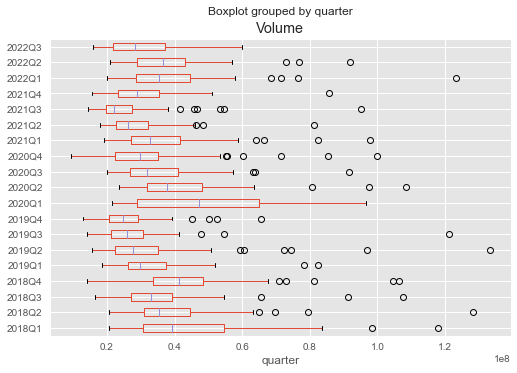

In [200]:
# visualisasi
googl.boxplot(by = 'quarter', column = 'Volume',vert = False)

# set multiple index set_index()

📈 Insight:

- Dari median: 
    - median tertinggi ada pada 2020Q1 volume sangat tinggi, banyaak orang yang jual atau beli karena awal pendemi
    - median volume terendah di 2021Q3
- Dari lebar kotak: 
    - 2020Q1 volume saham sangat fluktuatif
    - 2021Q3 paling stabil
- Dari outlier: 
    - 2019Q2 outlier tertinggi
    - 2020q1 dan 2022q3 tidak memilik outlier
    - 2021q3 banyak outlier, artinya banyak kejadian luar biasa

## (Additional) Other Python Libraries for Visualization

Apabila Anda tertarik mengenai visualisasi di Python, silahkan eksplorasi lebih lanjut package-package berikut:

- `matplotlib`: semua elemen pada visualisasi dapat dikustomisasi, namun membutuhkan code yang lebih panjang. [Dokumentasi Matplotlib](https://matplotlib.org/3.2.2/tutorials/index.html) 
- `seaborn`: dikembangkan dari `matplotlib`, lebih sedikit yang dapat dikustomisasi namun lebih mudah. [Dokumentasi Seaborn](https://seaborn.pydata.org/introduction.html)
- `plotly`: plot interaktif serta kompatibilitas dengan bahasa lain yang tinggi. [Dokumentasi Plotly](https://plotly.com/python/)
- `altair`: plot interaktif yang bersifat deklaratif, code relatif lebih mudah. [Dokumentasi Altair](https://altair-viz.github.io/index.html)

Referensi perbandingan library: https://askalgo-py.netlify.app/faq/dwv#adakah-library-visualisasi-data-di-python-selain-matplotlib

--- END OF DAY 3----

# Group By: Aggregation Table

Teknik yang tak kalah penting adalah operasi **group by**. Mungkin untuk Anda yang sudah pernah menggunakan SQL atau tools lain seperti `tidyverse` pada bahasa R akan familiar dengan operasi group by ini.

❗️ Misalkan kita punya dataframe `close_melted` yang ingin kita bandingkan nilai `Close` hariannya pada saham AAPL, TSLA, dan GOOGL:

❓ **Pertanyaan**: Di antara AAPL, TSLA, GOOGL, manakah saham yang memiliki **rata-rata** `Close` harian tertinggi?

Pertama, coba buatlah tabel agregasi dengan `crosstab()` dan juga `pivot_table()`:

In [ ]:
# versi crosstab


In [ ]:
# versi pivot_table: 


**Ingat kembali:** 

Persamaan antara `crosstab` dan `pivot_table` yaitu keduanya dapat digunakan untuk menghasilkan tabel agregasi yang memiliki parameter `index`, `columns`, `values`, and `aggfunc`.

Perbedaan antara `crosstab` dan `pivot_table` dapat dirangkum dalam tabel berikut:

|                                                                                    | `pd.crosstab()` | `pd.pivot_table()` |
|------------------------------------------------------------------------------------|-----------------|--------------------|
|                                                                          **Input** | Array of values/Series |          DataFrame (parameter `data`)|
|                                                              **Default `aggfunc`** |       `'count'` |           `'mean'` |
|                                                          **Parameter `columns`** |       Mandatory |      Optional |
|                                                          **Parameter `normalize`** |       Available |      Not Available |
| [**Computation Time**](https://ramiro.org/notebook/pandas-crosstab-groupby-pivot/) | Relatively Slower |  Relatively Faster |

Bandingkan dengan method `groupby()`:

In [ ]:
# versi groupby


In [ ]:
# mengurutkan tabel hasil groupby berdasarkan nilai Close


Istilah **group by** merupakan gabungan dari proses:

1. Split: mengelompokkan baris, co: dikelompokkan berdasarkan `Symbols`
2. Apply: menerapkan fungsi untuk masing-masing kelompok, co: dihitung mean untuk masing-masing `Symbols`
3. Combine: mengembalikan hasil dalam bentuk 1 tabel

Ilustrasi proses **split-apply-combine** dapat dilihat pada [Google Sheet](https://docs.google.com/spreadsheets/d/1i58D8cXXGfKVs_2yBzXp4vD1Dku2p6HvDaCJBLB_-rg/edit#gid=0)

## Visualizing Barchart for Comparison

Sampai di sini kita tahu bahwa GOOGL memiliki rata-rata `Close` transaksi harian tertinggi dari visualisasi bar plot yang dihasilkan pada bagian sebelumnya. Untuk selanjutnya, mari kita menganalisa `Close` dari saham GOOGL. Kita bisa menggunakan method `day_name()` untuk mengekstrak nama hari dari `Date`:

In [ ]:
googl = stock.xs('GOOGL', level='Symbols', axis=1).copy()
googl['Close_Diff'] = googl['Close'].diff()
googl['Weekday'] = googl.index.day_name()
googl

Perhatikan kolom `Close_Diff` yang dibuat di atas, nilai ini merupakan perbedaan antara nilai `Close` pada hari tertentu dengan hari berikutnya.

❓ **Kasus:** Misalkan kita ingin membandingkan `Close_Diff` di setiap hari kerja. Untuk saham GOOGL, apakah secara rata-rata pada hari Kamis (Thursday) mencatat perbedaan yang lebih tinggi dibandingkan dengan hari Jumat (Friday)?

In [ ]:
# mempersiapkan data: gunakan groupby


In [ ]:
# visualisasi


❓ **Diskusi:** Apakah plot di atas sudah cukup efektif? Kalau belum, apa yang perlu diperbaiki dari plot di atas?

<!--
googl_close_diff = googl.groupby('Weekday').mean()['Close_Diff']
googl_close_diff.index

wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
googl_close_diff.index = pd.CategoricalIndex(
    data = googl_close_diff.index,
    categories = wday,
    ordered = True)
googl_close_diff.index
-->

- 
- 

In [ ]:
# visualisasi perbaikan


Apakah secara rata-rata pada hari Kamis (Thursday) mencatat perbedaan yang lebih tinggi dibandingkan dengan hari Jumat (Friday)? <br>

📈 Insight: 
- ....

## Using Grouped Barchart

💭 Masih ingat dengan dataframe `closingprice`? Kita akan coba memvisualisasikan **grouped barchart** untuk membandingkan nilai `Close` untuk ketiga saham **setiap bulannya** pada kuartal pertama tahun 2018.

- Pertama, kita memastikan `closingprice` tidak memiliki missing values dengan melakukan imputasi forward dan backward fill.
- Selanjutnya, gunakan objek `closingprice` untuk menampilkan nilai **rata-rata** `Close` untuk setiap bulannya. Simpan tabel agregasi ke objek `average_closing`.

📌 Note: untuk mengambil nama bulan tidak perlu `.dt` lagi, karena sudah berupa objek DatetimeIndex.

In [ ]:
closingprice.tail(10)

In [ ]:
# mempersiapkan data


Visualisasi:

- Index menjadi sumbu horizontal
- Column menjadi grouping untuk bar chartnya

In [ ]:
# visualisasi


❓ **Diskusi:** Apakah plot di atas sudah cukup efektif? Kalau belum, apa yang perlu diperbaiki dari plot di atas?

- ...

In [ ]:
# improvement visualisasi


📈 Insight: 
- 
- 
- 

## 💭 Knowledge Check: Group By + Reshaping

Misal Anda dihadapkan dengan long DataFrame seperti pada `closingprice_melt` berikut:

In [ ]:
closingprice_melt = closingprice.melt(id_vars='Month', value_name='Close')
closingprice_melt

❓ Kira-kira bagaimana cara kita mengubah bentuk `closingprice_melt` menjadi `average_closing`?

**Hint:** Gunakan teknik `groupby` dan juga reshaping

In [ ]:
#(groupby)


Ilustrasi group by pada kasus di atas dapat dilihat pada [Google Sheet](https://docs.google.com/spreadsheets/d/1i58D8cXXGfKVs_2yBzXp4vD1Dku2p6HvDaCJBLB_-rg/edit?usp=sharing)

## Combining `agg` and `groupby`

❗️ Perhatikan group by operation di bawah ini yang di-chaining dengan aggregate method `mean()`:

In [ ]:
stock_long = stock.stack().reset_index()
stock_long.head()

In [ ]:
# aggregasi biasa


Misalkan kita ingin membuat tabel agregasi dengan `aggfunc` yang berbeda-beda untuk masing-masing `Symbols` berupa:
- Maximum `stock` price (`max` dari `High`)
- Minimum `stock` price (`min` dari `Low`)
- Rata-rata closing price (`mean` dari `Close`)

Untuk mendapat hasil tersebut, kita harus melakukan chaining `groupby` dengan method `agg`. Kita harus menyertakan mapping (**dictionary**) untuk setiap kolom dengan fungsi agregasinya seperti berikut ini:

Syntax:

```
.agg({
    'NAMA_KOLOM': 'FUNGSI_AGREGASI'
})
```

In [ ]:
# contoh penggunaan method agg untuk menerapkan fungsi std pada 1 kolom, yaitu Close


❓ Visualisasikan tabel agregasi di atas untuk membandingkan nilai tersebut:

In [ ]:
# visualisasi


📈 Insight:
- 

## 💭 Knowledge Check: Vizualization

Perhatikan dataframe `monthly_closing` berikut:

In [ ]:
stock['YearMonth'] = stock.index.to_period('M')
monthly_closing = stock.groupby('YearMonth').mean()['Close']
monthly_closing.head()

Tipe plot mana yang paling sesuai untuk data di atas, apabila kita ingin melihat pergerakan nilai `Close` dari waktu ke waktu?

- [ ] Line plot `.plot()`
- [ ] Scatter plot `.plot.scatter(x, y)`
- [ ] Bar plot `.plot.bar()`
- [ ] Box plot `.plot.box()`

In [ ]:
# your code here
